# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

In [35]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug200.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [30]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.s
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
MEDICAMENTOS = "Capitulo_3/drug200.csv"

def extraer_datos(root, database):

    csv_path = root + database

    return pd.read_csv(csv_path)

In [31]:
# Visualiza el DataFrame
df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [33]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

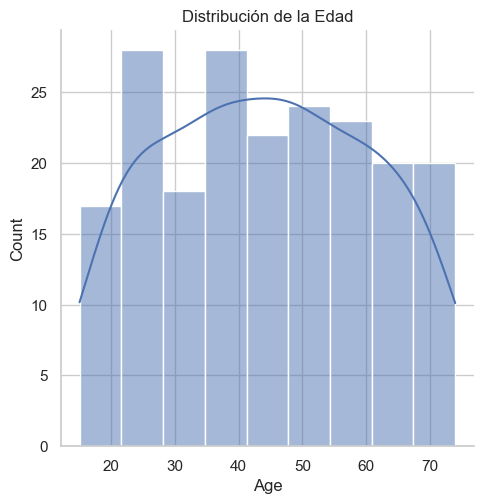

In [37]:
#Importa seaborn para tener gráficos más chidos
import seaborn as sns
#Gráfica la variable 
sns.set(style="whitegrid")
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age, kde=True)
plt.title('Distribución de la Edad')
plt.show()

In [38]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

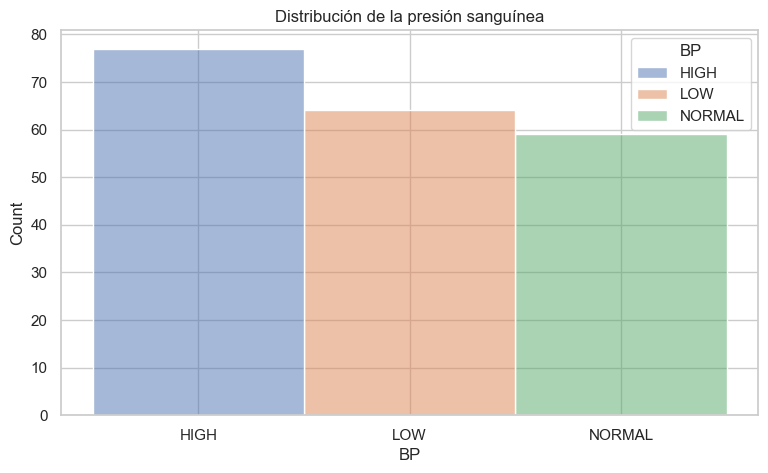

In [ ]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP", hue="BP")

plt.title('Distribución de la presión sanguínea')
plt.show()

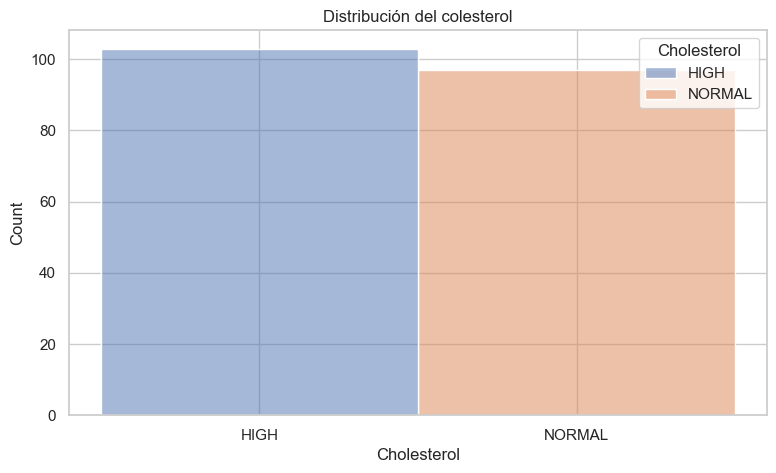

In [ ]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))
sns.histplot(data=df, x="Cholesterol", hue="Cholesterol")

plt.title('Distribución del colesterol')
plt.show()

<Figure size 900x500 with 0 Axes>

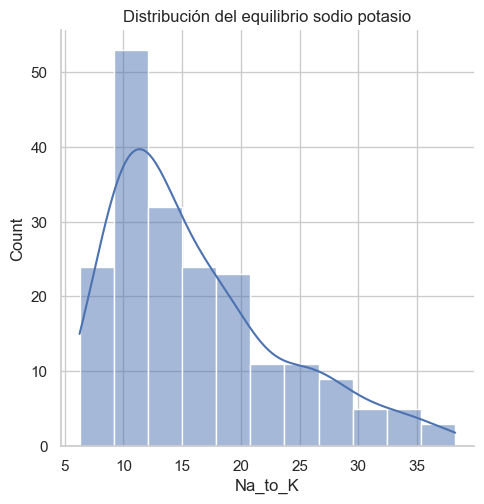

In [ ]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K, kde=True)

plt.title('Distribución del equilibrio sodio potasio')
plt.show()

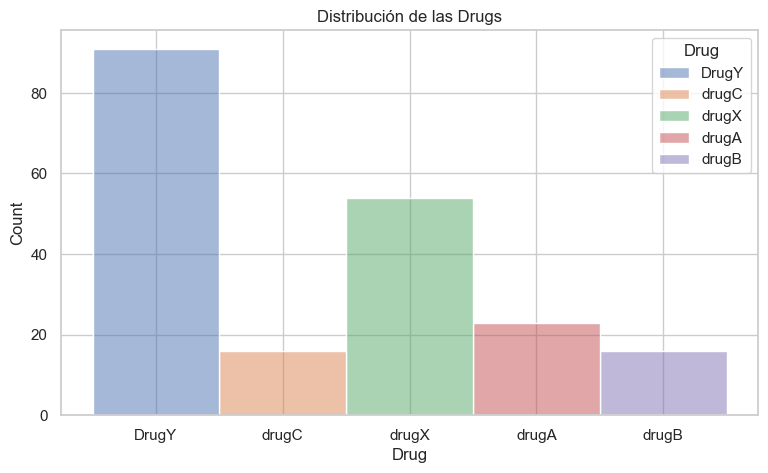

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [ ]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize = (9,5))
sns.histplot(data=df, x="Drug", hue="Drug")

plt.title('Distribución de las Drugs')
plt.show()
#Cuenta los medicamentos
df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


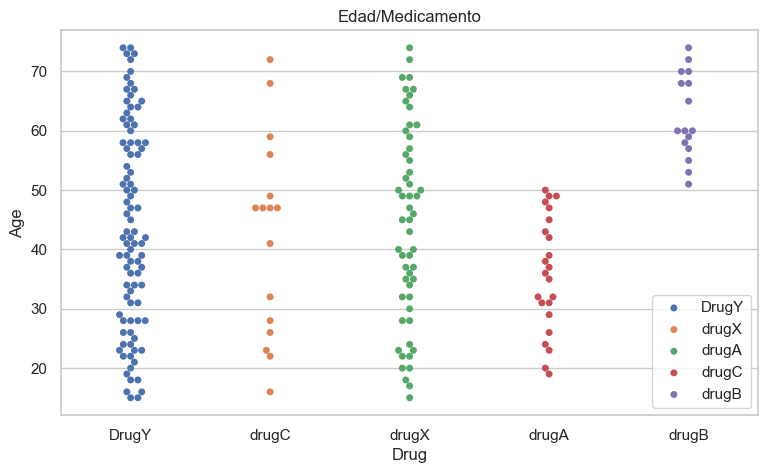

In [ ]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age", hue="Drug", data = df)
plt.legend(df.Drug.value_counts().index)

plt.title("Edad/Medicamento")
plt.show()

In [50]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


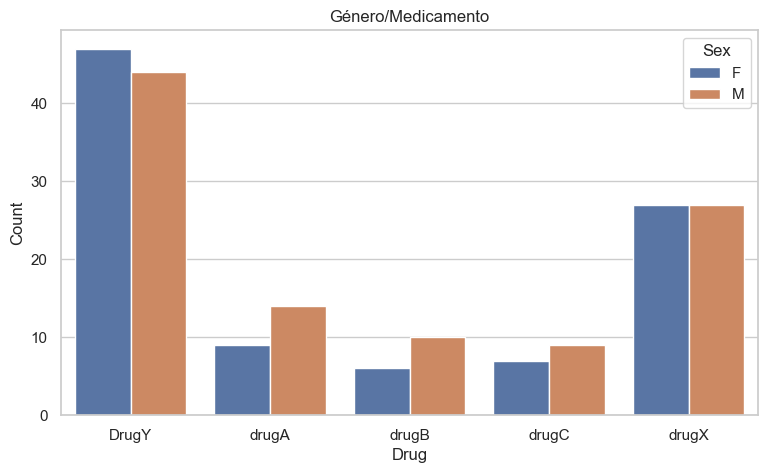

In [ ]:
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex", data = df_Sex_Drug)

plt.title("Género/Medicamento")
plt.show()

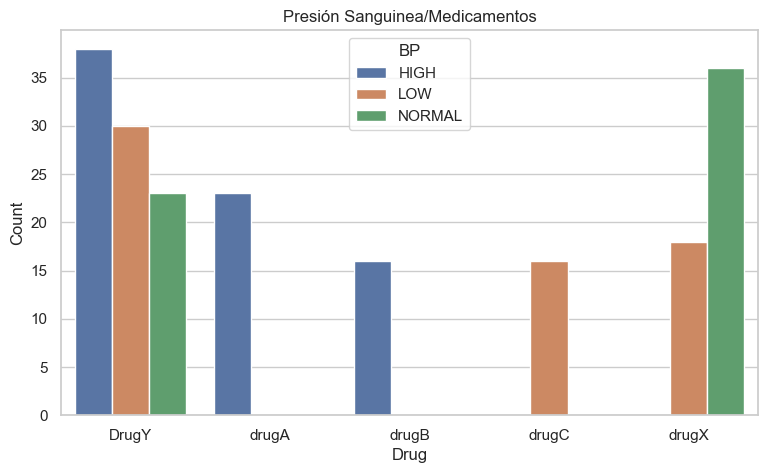

In [53]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y="Count", hue = "BP",data = df_BP_Drug)

plt.title("Presión Sanguinea/Medicamentos")
plt.show()

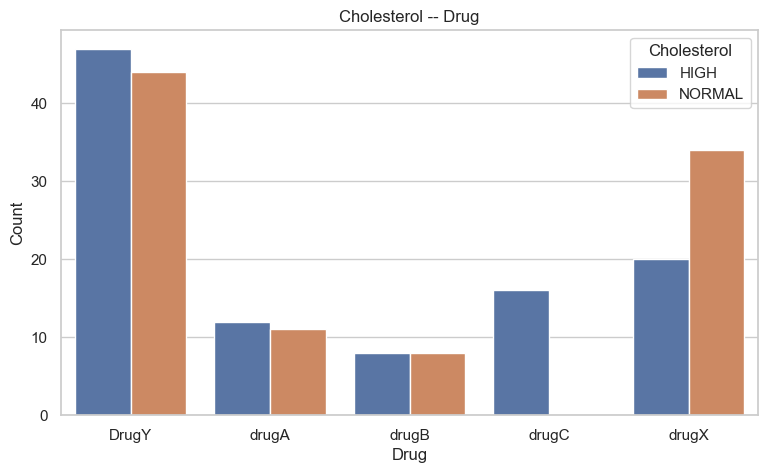

In [54]:
# Grafica (con una gráfica de barras) la relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)

plt.title("Cholesterol -- Drug")
plt.show()

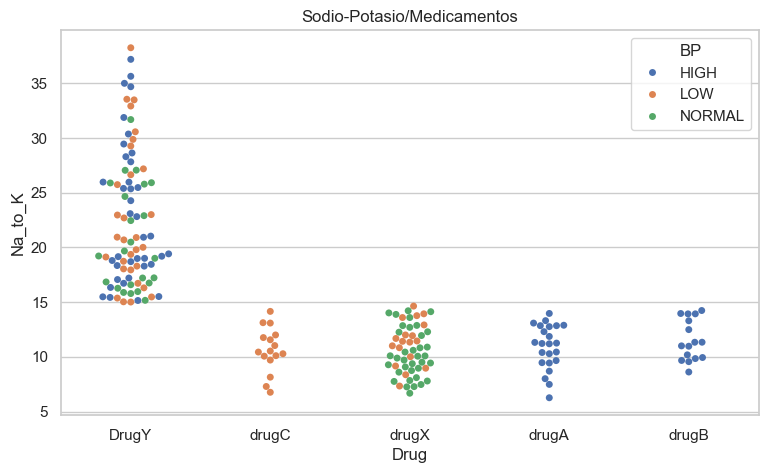

In [59]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K", data = df, hue = "BP")

plt.title("Sodio-Potasio/Medicamentos")
plt.show()

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [61]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])


In [ ]:
# Crear set de entrenamiento y set de prueba
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:
    label_encoder(l)

df.head()

x = df.drop(["Drug"],axis=1)
y = df.Drug

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [87]:
## Crear modelo para medicamento
y_train_c = (y_train == 0)

y_test_c = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [70]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([[47, 1, 1, 5, 8]])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([4])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [77]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, x_train, y_train, cv=3, scoring="accuracy")

array([0.44444444, 0.60377358, 0.58490566])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [91]:
# Modelo que nunca es Y
def predict_nunca_y(X):
    return np.zeros(len(X), dtype = bool)

fit_nunca_y(x_train, y_train)
print(predict_nunca_y(x_test))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [ ]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[61, 15,  0,  0,  0],
       [ 5, 10,  0,  0,  2],
       [ 3,  5,  1,  0,  4],
       [ 4,  5,  0,  0,  2],
       [16, 11,  1,  0, 15]])

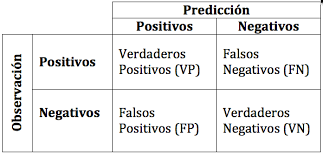

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [94]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

p = precision_score(y_train, y_train_pred, average = 'macro')

r = recall_score(y_train, y_train_pred, average = 'macro')

p,r

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.41099169516365414, 0.3633254318580836)

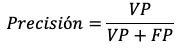

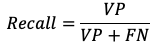

In [95]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train, y_train)

y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
#Hacer la matriz de confusión otra vez
confusion_matrix(y_train,y_train_pred)

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [97]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train, y_train_pred, average = 'macro')
r = recall_score(y_train, y_train_pred, average = 'macro')

p,r

(0.9468676122931443, 0.9092565329407435)

In [98]:
#Calcular F1
from sklearn.metrics import f1_score

F1 = f1_score(y_train, y_train_pred, average = 'macro')
F1

0.9234407431381987

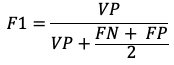

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [110]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47, 1, 1, 0, 8]])
y_score

threshold = 0

y_some_pred = (y_score > threshold)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


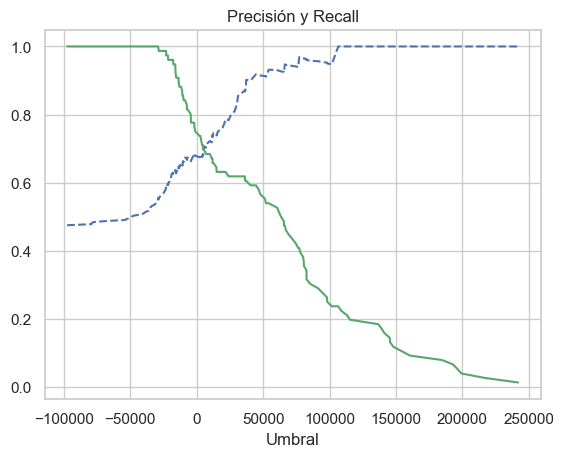

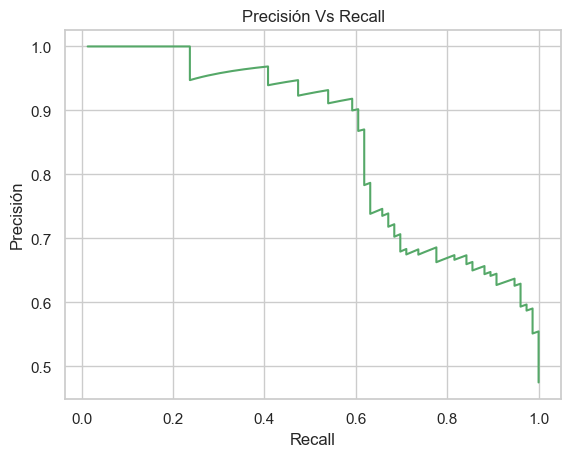

In [120]:
#Graficar la precisión y recall 
from sklearn.metrics import precision_recall_curve

clase_objetivo = 0

y_scores = cross_val_predict(sgd, x_train, y_train, cv=3, method="decision_function")
y_train_bin = (y_train == clase_objetivo)

precisions, recalls, umbrales = precision_recall_curve(y_train_bin, y_scores[:, clase_objetivo])

plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.xlabel("Umbral")
plt.title(f"Precisión y Recall")
plt.show()
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
plt.plot(recalls[:-1], precisions[:-1], "g-", label="Precisión vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precisión")
plt.title(f"Precisión Vs Recall")
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [121]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

np.float64(37261.38594582169)

In [124]:
#Arroja la precisión y recall para un umbral de 90
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
y_pred_90 = (y_scores[:, clase_objetivo] >= umbral_90)

precision_90 = precision_score(y_train_bin, y_pred_90)
recall_90 = recall_score(y_train_bin, y_pred_90)

precision_90, recall_90

(0.9019607843137255, 0.6052631578947368)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [125]:
#Importar roc_curve
from sklearn.metrics import roc_curve

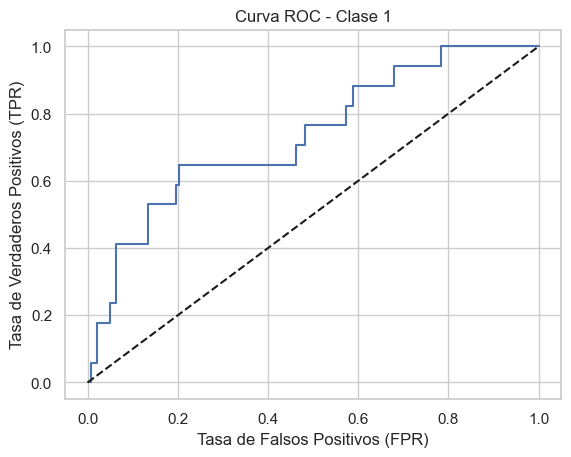

In [128]:
#Graficar la curva ROC
clase_objetivo = 1

y_train_bin = (y_train == clase_objetivo)
y_scores_bin = y_scores[:, clase_objetivo]

fpr, tpr, umbrales = roc_curve(y_train_bin, y_scores_bin)

plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title(f"Curva ROC - Clase {clase_objetivo}")
plt.grid(True)
plt.show()
#Poner una cuadrícula


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [135]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score

clase_objetivo = 1
y_train_bin = (y_train == clase_objetivo)
y_scores_bin = y_scores[:, clase_objetivo]

auc_bin = roc_auc_score(y_train_bin, y_scores_bin)
auc_bin

0.7342657342657343

In [137]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc, x_train, y_train, cv=3, method="predict_proba")
y_forest

array([[0.01, 0.07, 0.  , 0.16, 0.76],
       [0.01, 0.01, 0.01, 0.01, 0.96],
       [0.03, 0.  , 0.01, 0.  , 0.96],
       [0.97, 0.  , 0.  , 0.02, 0.01],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.06, 0.03, 0.05, 0.38, 0.48],
       [0.98, 0.  , 0.  , 0.02, 0.  ],
       [0.98, 0.02, 0.  , 0.  , 0.  ],
       [0.82, 0.  , 0.18, 0.  , 0.  ],
       [0.01, 0.01, 0.03, 0.05, 0.9 ],
       [0.02, 0.04, 0.01, 0.07, 0.86],
       [0.96, 0.  , 0.  , 0.01, 0.03],
       [0.  , 0.  , 0.01, 0.09, 0.9 ],
       [0.84, 0.  , 0.16, 0.  , 0.  ],
       [0.04, 0.02, 0.01, 0.  , 0.93],
       [0.94, 0.  , 0.  , 0.01, 0.05],
       [0.  , 0.75, 0.19, 0.03, 0.03],
       [0.97, 0.03, 0.  , 0.  , 0.  ],
       [0.95, 0.  , 0.  , 0.  , 0.05],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.69, 0.05, 0.09, 0.08],
       [0.98, 0.  , 0.02, 0.  , 0.  ],
       [0.02, 0.16, 0.75, 0.07, 0.  ],
       [0.97, 0.  , 0.  , 0.03, 0.  ],
       [0.01, 0.03, 0.  , 0.08, 0.88],
       [0.95, 0.  , 0.04,

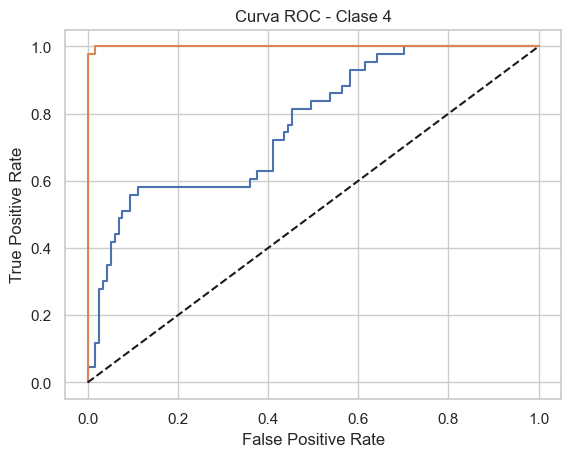

In [143]:
#Graficar la curva ROC y la predicción de random forest 
clase_objetivo = 4

y_train_bin = (y_train == clase_objetivo)
y_scores_sgd_clase = y_scores[:, clase_objetivo]
y_scores_forest_clase = y_forest[:, clase_objetivo]

fpr_sgd, tpr_sgd, _ = roc_curve(y_train_bin, y_scores_sgd_clase)
fpr_forest, tpr_forest, _ = roc_curve(y_train_bin, y_scores_forest_clase)

plt.plot(fpr_sgd, tpr_sgd, label="SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label="RF ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curva ROC - Clase {clase_objetivo}")
plt.grid(True)
plt.show()


In [146]:
#Calcular el puntaje (área bajo la curva) de random forest  
auc_forest = roc_auc_score(y_train, y_forest, multi_class='ovr', average='macro')
auc_forest

0.9989812821348181

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [149]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm = SVC()

svm.fit(x_train,y_train)

svm.predict([[25, 0, 1, 0, 167]])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [150]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25, 0, 1, 0, 167]])

some_scores
#Decidirá por el qué tenga mayor puntaje

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29349959,  1.78865857,  0.769853  , -0.27117688,  3.16304987]])

In [153]:
#Ahora, utiliza el clasificador multiclase 
np.argmax(some_scores)
#Predecir a un humano ahora con este clasificador
svm = SVC(probability=True)
svm.fit(x_train, y_train)

nuevo_ejemplo = [[25, 0, 1, 0, 167]]
some_scores = svm.predict_proba(nuevo_ejemplo)  # Devuelve array 2D con probabilidad por clase

# Obtener clase con mayor score/probabilidad
clase_predicha = np.argmax(some_scores)
clase_predicha

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


np.int64(0)

In [155]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25, 0, 1, 0, 167]])
some_scores

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29349959,  1.78865857,  0.769853  , -0.27117688,  3.16304987]])

In [157]:
#campararlo con los datos obtenidos de sgd.fit 
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
svm.predict([[25, 0, 1, 0, 167]])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

***

## <span style="color:green">8. Analizar Errores</span>

In [161]:
#Hacer un clasificador de random forest
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

conf_mz = confusion_matrix(y_test, y_pred)
conf_mz

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]])

In [159]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)

conf_mz = confusion_matrix(y_train, y_train_pred)
conf_mz

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [160]:
#utilizar ahora SGD
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

y_train_pred_sgd = cross_val_predict(sgd, x_train, y_train, cv=3)

conf_mz_sgd = confusion_matrix(y_train, y_train_pred_sgd)
conf_mz_sgd

array([[68,  0,  0,  6,  2],
       [ 6,  0,  5,  4,  2],
       [ 0,  0,  4,  4,  5],
       [ 2,  0,  2,  3,  4],
       [ 7,  0,  8, 11, 17]])